In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py # package change b/c plotly.plotly is deprecated. 
from plotly.offline import iplot, plot


In [2]:
from CarFactory import CarFactory
from Street import Street, StreetRamp, StreetAuto
from Constants import *

In [ ]:
# Experiment with varying p factors
prob_auto, prob_car = 0, 1 # all normal cars, ignoring their automatic car implementation
num_lane = 3
# TODO: need to modify road length implementation so that different lanes can have different 
# lengths to faciliate merging
road_length = 500 # 5 km
flow_in = 10 # vehicle per second

p_factors = [-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 10]
avg_speeds = []
med_speeds = []
times = []
for p in p_factors:
    print(p)
    cf = CarFactory(prob_auto, prob_car, p, T_REACTION_HUMAN)
    road = Street(num_lane, road_length, cf)
    avg_speed = []
    med_speed = []
    time = []

    for i in range(1000):
        road.update(flow_in)
    
        if i % 10 == 0:
            road.report()
            avg_speed.append(road.get_avg_vel())
            med_speed.append(road.get_median_vel())
            time.append(road.get_time())
    avg_speeds.append(avg_speed)
    med_speeds.append(med_speed)
    times.append(time)

In [ ]:
plt.plot(times[0], avg_speeds[0], label=-0.1)
plt.plot(times[1], avg_speeds[1], label=0.0)
plt.plot(times[2], avg_speeds[2], label=0.1)
plt.plot(times[3], avg_speeds[3], label=0.2)
plt.plot(times[4], avg_speeds[4], label=0.3)
plt.plot(times[5], avg_speeds[5], label=0.4)
plt.plot(times[6], avg_speeds[6], label=0.5)
plt.plot(times[7], avg_speeds[7], label=0.6)
plt.plot(times[8], avg_speeds[8], label=0.7)
plt.plot(times[9], avg_speeds[9], label=0.8)
plt.plot(times[10], avg_speeds[10], label=0.9)
plt.plot(times[11], avg_speeds[11], label=1.0)
plt.plot(times[12], avg_speeds[12], label=1.1)
plt.plot(times[13], avg_speeds[13], label = 10)
plt.xlabel("Time")
plt.ylabel("Avg speed")
plt.title("Avg speed vs time for politeness factor in [-0.1, 1.1]")
# plt.xlim([0,50])
# plt.ylim([5,10])
plt.legend()

In [ ]:
print(med_speeds[2])

In [3]:
# Experiment with varying the t factor
prob_auto, prob_car = 0, 1 # all normal cars, ignoring their automatic car implementation
num_lane = 3
# TODO: need to modify road length implementation so that different lanes can have different 
# lengths to faciliate merging
road_length = 500 # 5 km
flow_in = 10 # vehicle per second

t_factors = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]
avg_speeds = []
med_speeds = []
times = []
for t in t_factors:
    cf = CarFactory(prob_auto, prob_car, P_FACTOR_CAR, t, DB_CAR)
    road = Street(num_lane, road_length, cf)
    avg_speed = []
    med_speed = []
    time = []

    for i in range(1000):
        road.update(flow_in)
    
        if i % 10 == 0:
            road.report()
            avg_speed.append(road.get_avg_vel())
            med_speed.append(road.get_median_vel())
            time.append(road.get_time())
    avg_speeds.append(avg_speed)
    med_speeds.append(med_speed)
    times.append(time)

-----------------------------------------------------------------
time =  0.50
total vehicle:    3, average speed 26.67, flow in 0.00 vehicle/s, flow out 0.00 vehicle/s
	 num cars in each lane [1. 1. 1.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time =  5.50
total vehicle:   33, average speed 26.67, flow in 0.00 vehicle/s, flow out 0.00 vehicle/s
	 num cars in each lane [11. 11. 11.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 10.50
total vehicle:   63, average speed 26.67, flow in 0.00 vehicle/s, flow out 0.00 vehicle/s
	 num cars in each lane [21. 21. 21.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 15.50
total vehicle:   93, average speed 26.67, flow in 0.00 vehicle/s, flow out 0.00 vehicle/s
	 num cars in e

In [4]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

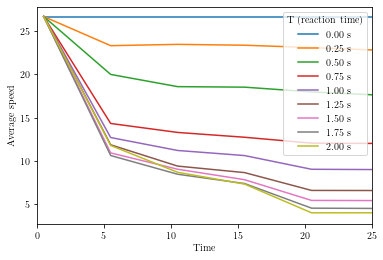

In [9]:
plt.plot(times[0], avg_speeds[0], label="0.00 s")
plt.plot(times[1], avg_speeds[1], label="0.25 s")
plt.plot(times[2], avg_speeds[2], label="0.50 s")
plt.plot(times[3], avg_speeds[3], label="0.75 s")
plt.plot(times[4], avg_speeds[4], label="1.00 s")
plt.plot(times[5], avg_speeds[5], label="1.25 s")
plt.plot(times[6], avg_speeds[6], label="1.50 s")
plt.plot(times[7], avg_speeds[7], label="1.75 s")
plt.plot(times[8], avg_speeds[8], label="2.00 s")
plt.xlabel("Time")
plt.ylabel("Average speed")
#plt.title("Avg speed vs time for reaction time in [0.0, 2.0] sec")
plt.xlim([0,25])
# plt.ylim([5,10])
plt.legend(title="T (reaction time)")
plt.savefig('t.png')
plt.show()

In [8]:
plt.savefig("t.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
# Experiment with changing the lane change threshold DB
# Experiment with varying the t factor
prob_auto, prob_car = 0, 1 # all normal cars, ignoring their automatic car implementation
num_lane = 3
# TODO: need to modify road length implementation so that different lanes can have different 
# lengths to faciliate merging
road_length = 500 # 5 km
flow_in = 10 # vehicle per second

db_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
avg_speeds = []
med_speeds = []
times = []
for db in db_values:
    cf = CarFactory(prob_auto, prob_car, P_FACTOR_CAR, T_REACTION_HUMAN, db)
    road = Street(num_lane, road_length, cf)
    avg_speed = []
    med_speed = []
    time = []

    for i in range(1000):
        road.update(flow_in)
    
        if i % 10 == 0:
            road.report()
            avg_speed.append(road.get_avg_vel())
            med_speed.append(road.get_median_vel())
            time.append(road.get_time())
    avg_speeds.append(avg_speed)
    med_speeds.append(med_speed)
    times.append(time)

In [ ]:
plt.plot(times[0], avg_speeds[0], label="0.0 s")
plt.plot(times[1], avg_speeds[1], label="0.25 s")
plt.plot(times[2], avg_speeds[2], label="0.5 s")
plt.plot(times[3], avg_speeds[3], label="0.75 s")
plt.plot(times[4], avg_speeds[4], label="1.0 s")
plt.plot(times[5], avg_speeds[5], label="1.25 s")
plt.plot(times[6], avg_speeds[6], label="1.5 s")
plt.plot(times[7], avg_speeds[7], label="1.75 s")
plt.plot(times[8], avg_speeds[8], label="2.0 s")
plt.plot(times[9], avg_speeds[9], label="2.0 s")
plt.plot(times[10], avg_speeds[10], label="2.0 s")
plt.xlabel("Time")
plt.ylabel("Avg speed")
plt.title("Avg speed vs time for reaction time in [0.0, 2.0] sec")
plt.xlim([0,25])
# plt.ylim([5,10])
plt.legend()